# I. INTRODUCTION

# I.I LIBRARIES 

In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pickle

# I.II PULLING OF DATA 

### Pull Data from Csv File

In [2]:
# df = pd.read_csv('creditcard.csv')

### Pull Data from Zip File 

In [3]:
df = pd.read_csv('creditcard_csv.zip', compression='zip',header=0,sep=',')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## I.III PROPERTIES OF DATA

In [5]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [6]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27404,34537.0,-3.026980,-0.285706,-0.594639,-0.980714,-0.501552,-0.770961,0.664072,0.656816,-0.214901,...,0.033747,-0.909404,-0.386549,-0.518349,-0.206760,0.621038,-0.488529,0.164390,29.00,0
150280,92956.0,-0.031976,0.836769,0.479674,-0.457776,0.460146,-0.843789,0.754156,-0.105462,1.080677,...,-0.356787,-0.686601,0.101034,-0.009689,-0.575656,0.078693,0.210167,0.081194,5.36,0
39872,40001.0,1.189199,0.250249,0.395744,0.728801,-0.422491,-0.810259,-0.043666,-0.036020,0.139985,...,-0.248601,-0.727914,0.209525,0.335911,0.069914,0.106861,-0.011965,0.028852,1.98,0
111501,72249.0,-0.675034,1.209240,1.601979,-0.004827,-0.245757,-1.122692,0.675291,-0.075128,-0.223819,...,-0.238462,-0.557614,0.021156,0.689480,-0.187822,0.055834,0.375467,0.183507,0.99,0
144980,86533.0,-0.470865,1.155204,0.153041,-0.785518,0.379862,-0.905819,0.876535,-0.054438,0.042820,...,-0.261545,-0.469979,0.083415,0.068958,-0.422659,0.123591,0.455159,0.216720,0.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


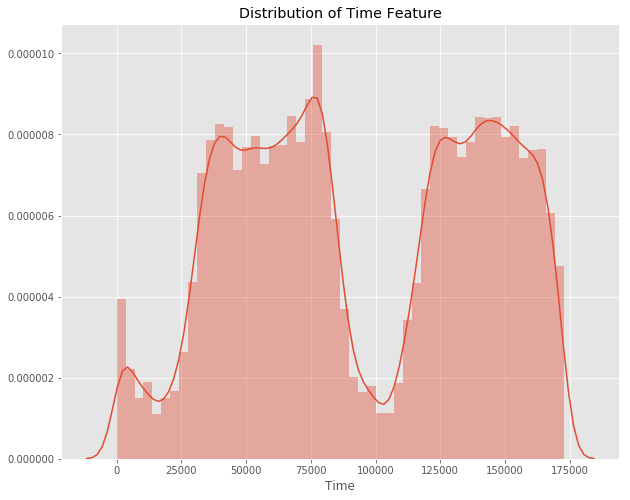

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

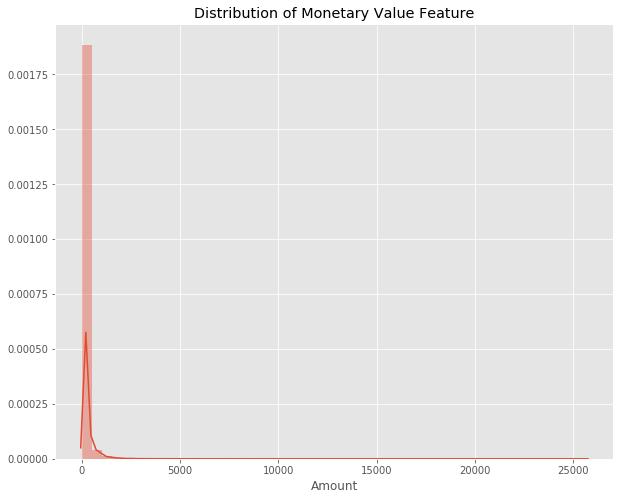

In [10]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [11]:
counts = df.Class.value_counts()

normal = counts[0]

fraudulent = counts[1]

perc_normal = (normal/(normal+fraudulent))*100

perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

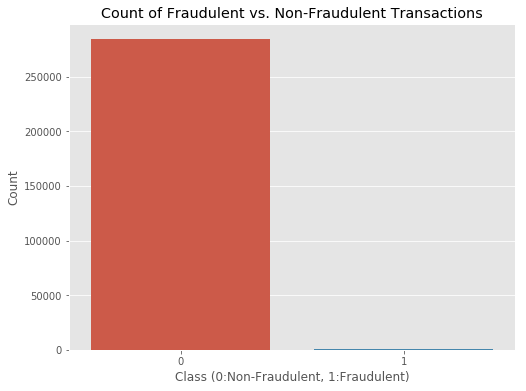

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [13]:
counts.index

Int64Index([0, 1], dtype='int64')

In [14]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

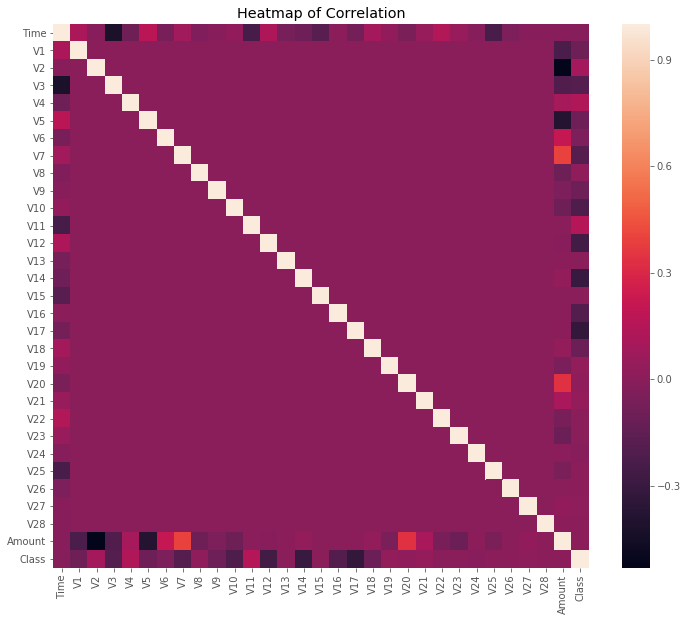

In [15]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [16]:
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# II. MACHINE LEARNING PROCESSING

## II.I. STANDARDIZATION

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

### Scaling Time

In [18]:
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

### Scaling Amount

In [19]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [20]:
# flat_list1 = []

# for sublıst ın scaledtıme.tolıst():
    #for item in sublist:
        #flat_list1.append(item)     

### DataFrame Processing After Standardization

In [21]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
210544,138029.0,2.017,-0.785,-1.465,-0.373,-0.584,-1.429,0.086,-0.467,-0.775,...,2.784e-01,0.014,-0.369,0.393,-0.093,-0.046,100.00,0,0.047,0.910
46635,42867.0,1.235,0.334,0.200,0.495,-0.103,-0.546,0.017,-0.069,-0.293,...,6.854e-02,-0.021,0.249,0.095,-0.024,0.019,2.69,0,-0.342,-1.094
81743,59069.0,1.344,-1.348,0.286,-1.637,-1.169,0.361,-1.209,0.163,-1.901,...,3.868e-02,-0.873,0.102,-0.352,0.040,0.019,80.65,0,-0.031,-0.753
129021,78924.0,1.205,0.221,0.624,0.551,-0.505,-0.781,-0.026,-0.082,-0.256,...,1.480e-01,0.535,0.166,0.064,-0.031,0.011,0.89,0,-0.350,-0.335
192150,129565.0,1.800,-0.944,-0.800,0.120,-0.479,0.353,-0.728,0.224,1.127,...,8.310e-04,0.239,-0.262,0.728,-0.070,-0.043,115.95,0,0.110,0.732


In [22]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [23]:
data = df.copy()
# data ANN de kullanilmak uzere kopyalandi

## II.II. HANDLING OF IMBALANCE PROBLEM

### Getting Train and Test Data Manually

In [24]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9 

# Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
# 0.9'dan küçük olanların true büyük olanların false olarak değiştirilip mask değişkenine atanacak.

train = df[mask] 

# Yalnızca true ve falselardan oluşan ve halihazırdaki dataframe'in uzunluğundaki mask arrayini kullnarak dataframeden 
# elde edilmiştir. Dataframe içindeki trueları aldı. 

test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))


Train Shape: (256607, 31)
Test Shape: (28200, 31)


In [25]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Train ve test datanın indexini yenileidk. Drop ile eski indexi gönderiyoruz dataframe içinde bir sütun olarak kalmıyor
# INplace ile yer değiştirmeyi yaptık. 

### How many Fraudulent Examples do We have in our Train data?

In [26]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 440 fraudulent transactions in the train data.


In [27]:
#randomly selecting 440 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

# class serisinde 0'a eşit olanları al 

### Randomly Choosing Same Number of Data from non-Fraudulent examples

In [28]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
133337,1.953,0.395,-0.198,3.528,0.347,0.773,-0.416,0.099,-0.542,1.406,...,0.510,0.078,-1.071,-0.123,0.063,0.017,-0.040,0,-0.349,-0.116
115337,1.437,-1.474,1.085,-1.284,-2.085,0.105,-1.811,0.303,-0.976,1.480,...,-0.231,0.040,-0.049,0.197,-0.186,0.063,0.014,0,-0.313,-0.341
14700,1.126,0.080,1.130,2.666,-0.201,1.340,-0.676,0.374,0.459,0.330,...,0.412,-0.209,-0.713,0.668,0.294,0.066,0.016,0,-0.347,-1.413
215332,1.497,-0.692,1.082,4.181,-0.940,1.932,-1.314,0.611,0.704,1.123,...,0.732,-0.002,-0.460,-0.315,0.079,0.062,-0.009,0,0.199,1.160
40973,0.835,-1.004,0.764,0.331,-1.200,-0.098,-0.362,0.005,1.157,-0.558,...,-0.562,-0.151,0.132,0.119,0.941,-0.071,0.048,0,0.512,-1.103


In [29]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [30]:
subsample = pd.concat([selected, fraud])
len(subsample)

880

In [31]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,2.194,-0.610,-1.613,-0.910,-0.101,-0.403,-0.620,-0.077,-0.166,0.207,...,-1.177,0.406,-0.145,-0.450,-0.663,-1.039e-04,-0.016,0,-0.253,0.538
1,-1.040,3.107,-5.409,3.110,-0.887,-2.498,-2.073,0.640,-3.013,-5.955,...,0.215,-0.184,-0.284,0.493,0.732,6.751e-01,0.337,1,0.026,1.279
2,1.020,-0.038,0.362,1.325,-0.179,0.148,0.010,0.139,0.084,0.031,...,-0.003,-0.117,0.018,0.601,-0.334,2.370e-02,0.014,0,-0.110,-1.311
3,0.168,-0.201,0.405,-2.109,0.241,0.031,-0.242,0.220,3.120,-1.692,...,0.970,0.358,0.079,-2.005,-1.575,4.239e-01,0.375,0,-0.237,0.230
4,-0.890,1.497,-0.574,1.022,0.378,-0.750,1.407,0.038,-0.779,0.004,...,0.689,-0.229,0.032,0.132,-0.371,4.870e-01,0.186,0,0.034,-0.172
5,-0.451,2.225,-4.953,4.342,-3.656,-0.020,-5.408,-0.748,-1.362,-4.171,...,0.496,1.154,-0.016,-2.080,-0.554,4.552e-01,0.001,1,0.102,-0.762
6,-0.138,0.422,0.723,-2.151,0.682,-0.908,1.135,-0.604,-1.672,0.121,...,0.734,-0.429,-0.387,0.287,-0.319,-8.426e-02,-0.108,0,-0.293,-0.912
7,-5.314,2.664,-4.251,0.395,-0.391,0.684,-5.134,-7.908,0.215,-2.298,...,-2.716,0.484,0.079,0.311,0.556,1.767e-01,0.363,1,-0.349,0.711
8,-0.918,0.680,-0.668,-2.329,1.017,-2.031,1.373,-2.337,0.508,-0.707,...,0.444,0.329,0.521,-0.259,0.511,3.461e-01,-0.013,0,-0.321,-0.163
9,1.214,0.370,0.296,0.635,-0.106,-0.582,0.069,-0.115,-0.105,-0.353,...,-0.643,0.148,0.058,0.173,0.121,-8.210e-04,0.029,0,-0.346,-1.208


### Visualizing New Dataset Called "subsample''

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

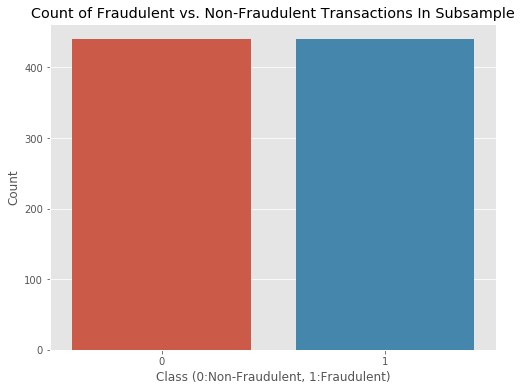

In [32]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

## II.III Removing Outliers

### Looking for Correlation between the Class Column and Other Columns

In [33]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.426
V2,0.489
V3,-0.576
V4,0.715
V5,-0.382
V6,-0.377
V7,-0.474
V8,0.052
V9,-0.559
V10,-0.624


In [34]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.576
V9,-0.559
V10,-0.624
V12,-0.674
V14,-0.749
V16,-0.589
V17,-0.555


In [35]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.715
V11,0.685
Class,1.000


### Visualizing Correlated Columns to See the Outliers

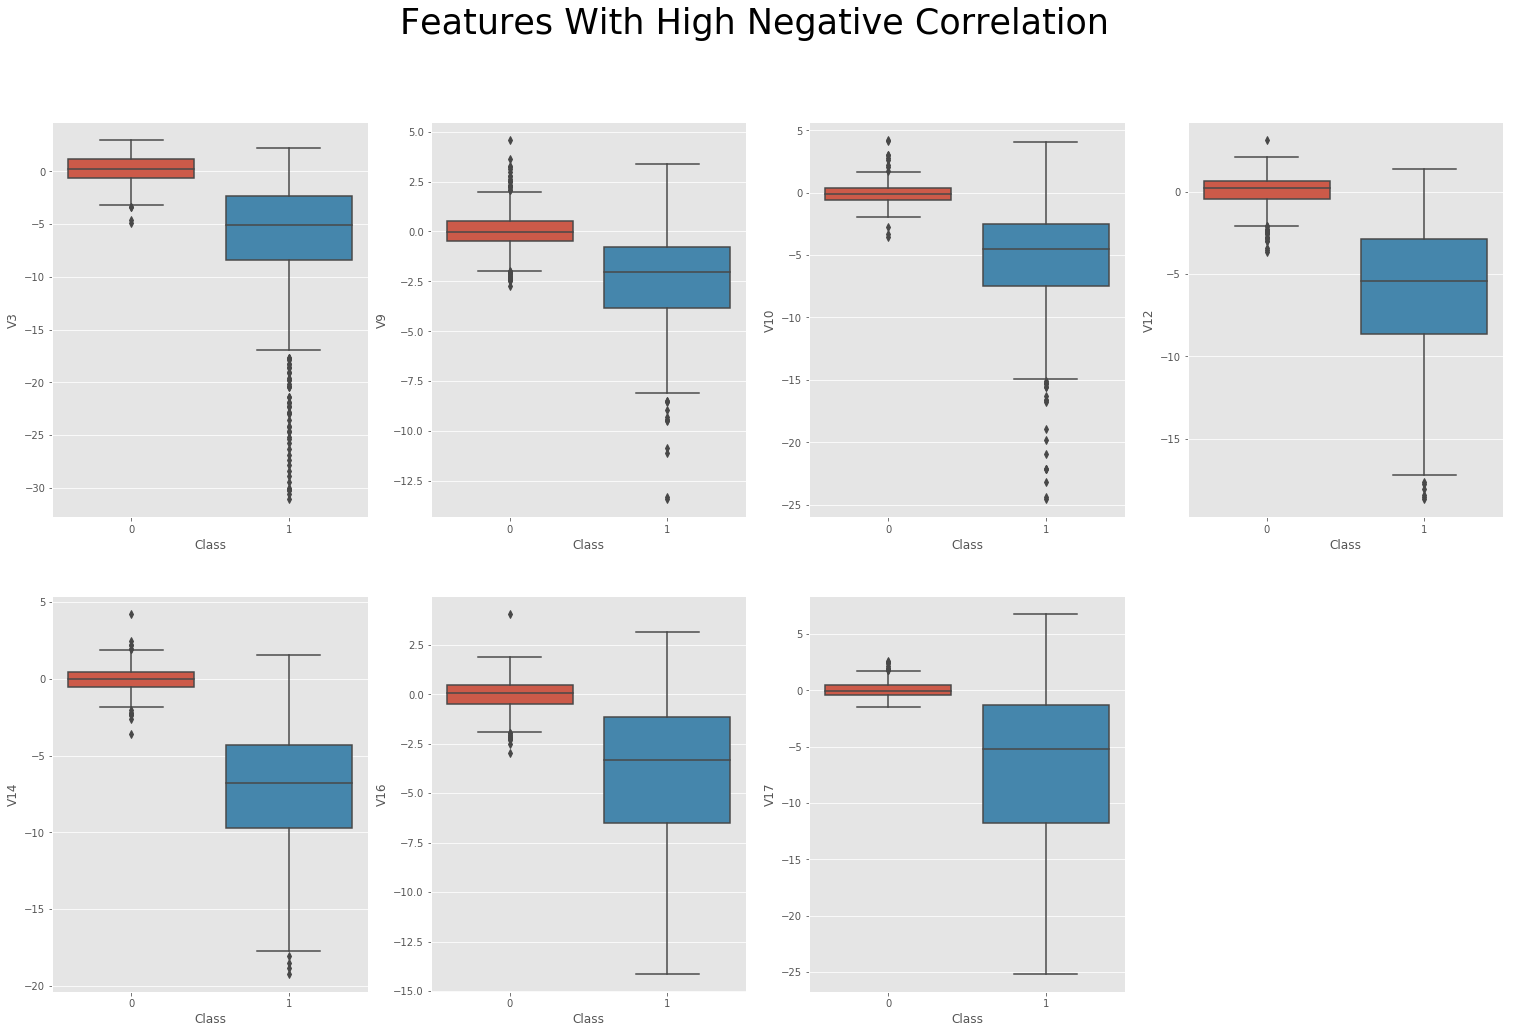

In [36]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

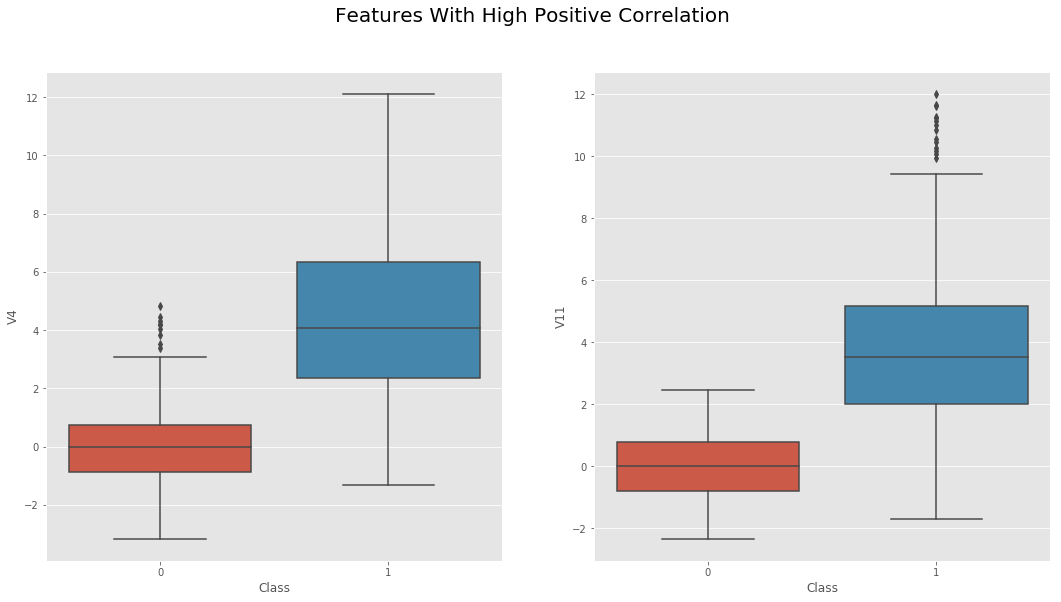

In [37]:

#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### Removing Extreme Outliers by Using IQR Method

In [38]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [40]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 880 transactions by 248 transactions to 632 transactions.


# III. MACHINE LEARNING ALGORITHMS 

## III.I CLUSTERING PROCESSING

### t-SNE Processing

In [41]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [42]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [43]:
# Yeni bir değişken yaptık. BU değişken oop sayesinde tsne libin özelliklerini taşıyor. X.VALUES ile x içi 
# değerleri alıyoruz.
# Değişkenler içeride 2 grup olacak.

In [44]:
X_reduced_tsne

array([[  6.316921  ,   0.92456394],
       [ 12.463666  ,  49.255695  ],
       [ -4.071106  ,  -8.259756  ],
       ...,
       [ -3.2623448 , -29.594797  ],
       [ 13.418752  ,  52.128605  ],
       [ 15.5927105 ,  63.600483  ]], dtype=float32)

### t-SNE Visualization

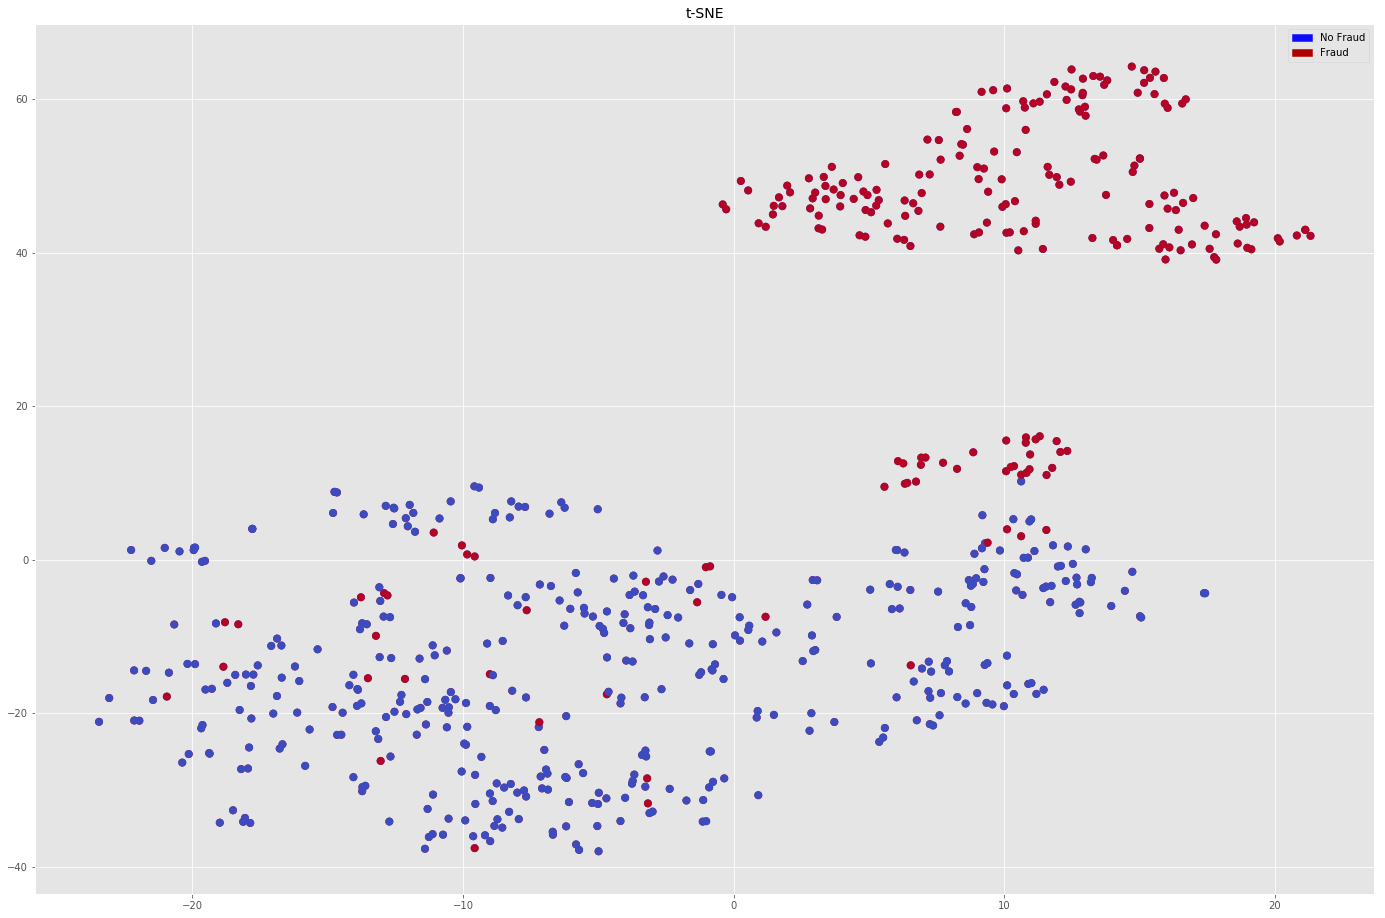

In [45]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Error turu 

## III.II CLASSIFICATION PREPROCESSING

### Import Libraries

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### Train-Test Splitting

In [48]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train = X_train.values  

# eskiden dataframedi artık matris oldu. values sayesinde dfden matris ve sayılar çekildi. 

X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [50]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (505, 30) (127, 30) 

Y_shapes:
 Y_train: Y_validation:
 (505,) (127,)


### Model Visualization Algorithm

In [51]:
import itertools
from sklearn import svm, datasets

def plot_confusion_matrix(title_plt,cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(None)
    plt.title(title_plt)
    plt.tight_layout()

### Pickle

In [52]:
import pickle

def model_kaydet(kernel,kernel_name,path='/home/cem/PycharmProjects/FraudDetection/models/'):
    pickle.dump(kernel,open(path+kernel_name,'wb'))
    
    # kernel kaydedilecek algonun adı. 
    # path ve algonun adı ile birlikte pycharm models

### F1 Algorithm

In [53]:
def get_f1(cm):
    recall = cm[0][0]/(cm[0][0]+cm[1][0])
    precision=cm[0][0]/(cm[0][0]+cm[0][1])
    return 2*precision*recall/(precision+recall),recall,precision

# III.III CLASSIFICATION PROCESSING ALGORITHMS

### Decision Trees

In [54]:
decision_tree = DecisionTreeClassifier()

In [55]:
decision_tree.fit(X_train,y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
y_pred = decision_tree.predict(X_validation)

In [57]:
cnf_matrix_decision_tree = confusion_matrix(y_validation,y_pred)

Confusion matrix, without normalization
[[66  7]
 [ 9 45]]


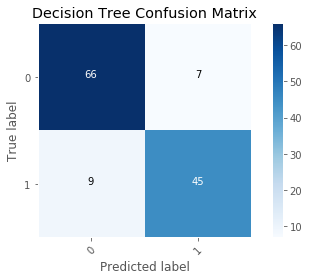

In [58]:
plot_confusion_matrix(title_plt='Decision Tree Confusion Matrix', cm=cnf_matrix_decision_tree, classes=[0,1])
plt.show()

In [59]:
f1_score , recall,precision= get_f1(cm=cnf_matrix_decision_tree)

In [60]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.8918918918918919 
recall =  0.88 
precision =  0.9041095890410958


In [61]:
decision_tree.score(X_validation,y_validation)

0.8740157480314961

In [62]:
model_kaydet(kernel=decision_tree,kernel_name='decision_tree')

In [63]:
decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Logistic Regression

In [64]:
model_LR = LogisticRegression(random_state=0)
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
model_LR.score(X_validation, y_validation)

0.9212598425196851

In [66]:
y_pred = model_LR.predict(X_validation)

In [67]:
cnf_matrix_logistic_regression = confusion_matrix(y_validation,y_pred)

In [68]:
f1_score , recall,precision= get_f1(cm=cnf_matrix_logistic_regression)

In [69]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.935064935064935 
recall =  0.8888888888888888 
precision =  0.9863013698630136


Confusion matrix, without normalization
[[72  1]
 [ 9 45]]


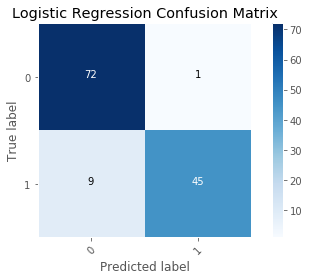

In [70]:
plot_confusion_matrix(title_plt='Logistic Regression Confusion Matrix', cm=cnf_matrix_logistic_regression, classes=[0,1])
plt.show()

In [71]:
model_kaydet(kernel=model_LR,kernel_name='logistic_regression')

### SVM - Linear

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_validation)
cm_svc_linear = confusion_matrix(y_validation,y_pred)

In [74]:
model_kaydet(kernel=svc,kernel_name='linear_svc')

In [75]:
f1_score , recall,precision= get_f1(cm=cm_svc_linear)

In [76]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.935064935064935 
recall =  0.8888888888888888 
precision =  0.9863013698630136


Confusion matrix, without normalization
[[72  1]
 [ 9 45]]


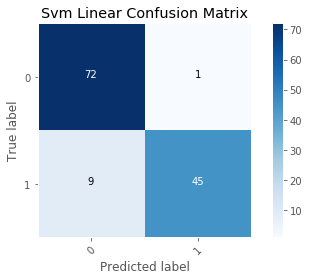

In [77]:
plot_confusion_matrix(title_plt='Svm Linear Confusion Matrix', cm=cm_svc_linear, classes=[0,1])
plt.show()

### SVC Kernel - Poly

In [78]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_validation)
cm_svc_poly = confusion_matrix(y_validation,y_pred)


In [79]:
model_kaydet(kernel=svc,kernel_name='poly_svc')

Confusion matrix, without normalization
[[73  0]
 [ 9 45]]


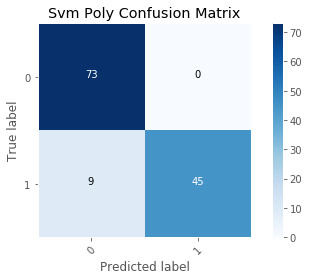

In [80]:
plot_confusion_matrix(title_plt='Svm Poly Confusion Matrix', cm=cm_svc_poly, classes=[0,1])
plt.show()

In [81]:
f1_score , recall,precision= get_f1(cm=cm_svc_poly)

In [82]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.9419354838709678 
recall =  0.8902439024390244 
precision =  1.0


### SVC Kernel  - Sigmoid

In [83]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_validation)
cm_svc_sigmoid = confusion_matrix(y_validation,y_pred)

In [84]:
model_kaydet(kernel=svc,kernel_name='sigmoid_svc')

In [85]:
f1_score , recall,precision= get_f1(cm=cm_svc_sigmoid)

In [86]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232


In [87]:
confusion_matrices_svm = [cm_svc_linear,cm_svc_poly,cm_svc_sigmoid]

Confusion matrix, without normalization
[[64  9]
 [19 35]]


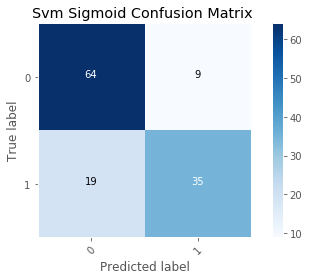

In [88]:
plot_confusion_matrix(title_plt='Svm Sigmoid Confusion Matrix ', cm=cm_svc_sigmoid, classes=[0,1])
plt.show()

### Random Forest

In [89]:
random_forest = RandomForestClassifier(n_estimators=100)

In [90]:
random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
model_kaydet(kernel=random_forest,kernel_name='randomforest')

In [92]:
y_pred = random_forest.predict(X_validation)

In [93]:
confusion_matrices_random_forest = confusion_matrix(y_validation,y_pred)


In [94]:
f1_score , recall,precision= get_f1(cm=confusion_matrices_random_forest)

In [95]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.9419354838709678 
recall =  0.8902439024390244 
precision =  1.0


Confusion matrix, without normalization
[[73  0]
 [ 9 45]]


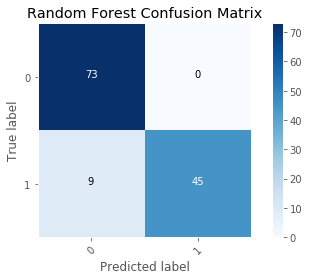

In [96]:
plot_confusion_matrix(title_plt='Random Forest Confusion Matrix', cm=confusion_matrices_random_forest, classes=[0,1])
plt.show()

In [97]:
random_forest.score(X_validation,y_validation)

0.9291338582677166

# Random Forest Visualization

In [98]:
#visualizing RF
#model = RandomForestClassifier(n_estimators=10)

# Train
#model.fit(X_train, y_train)
#model_kaydet(kernel=model,kernel_name='randomforestviz')
# Extract single tree
#estimator = model.estimators_[5]

#from sklearn.tree import export_graphviz
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = X.columns.tolist(),
                #class_names = ['0',' 1'],
                #rounded = True, proportion = False, 
                #precision = 2, filled = True)


In [99]:
# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')


### After Pickle

In [100]:
logistic_regression = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/randomforest','rb'))
decisiontree = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/decision_tree','rb'))
sigmoid_svc = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/sigmoid_svc','rb'))
poly_svc = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/poly_svc','rb'))
linear_svc = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/linear_svc','rb'))
random_forest = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/randomforest','rb'))

# Kaydettiklerimizi yüklüyoruz.

In [101]:
models = []

models.append(('LR', logistic_regression))
models.append(('decisiontree', decisiontree))
models.append(('sigmoid_svc', sigmoid_svc))
models.append(('linear_svc', sigmoid_svc))
models.append(('poly_svc', sigmoid_svc))
models.append(('random_forest', random_forest))

# Models listesi içine ilgili oop classifierları ilgili isimleri ile birlikte tuple halinde ekleniyor. 
# printte loglara ilgili classifierların isimlerini yazabilmek için. 

In [102]:
models[0]

('LR',
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False))

### All Confusion Matrices

In [103]:
def confusion_matrix_yuzde(cm):
    dogru=(cm[0][0]+cm[1][1])
    total = np.sum(cm)
    return(dogru/total)

In [104]:
x = []
for name,model in models:
    predictions = model.predict(X_validation)
    cnf = confusion_matrix(y_validation,predictions.round())
    
    yuzde = confusion_matrix_yuzde(cm=cnf)
    f1_score , recall,precision= get_f1(cm=cnf)

    print(name,'->','\n',cnf,'\n\n',yuzde,'\n','f1_score : ',f1_score,'\nrecall = ',recall,'\nprecision = ',precision)
    x.append(predictions)

    sumpredictions = [sum(elts) for elts in zip(*x)]

LR -> 
 [[73  0]
 [ 9 45]] 

 0.9291338582677166 
 f1_score :  0.9419354838709678 
recall =  0.8902439024390244 
precision =  1.0
decisiontree -> 
 [[66  7]
 [ 9 45]] 

 0.8740157480314961 
 f1_score :  0.8918918918918919 
recall =  0.88 
precision =  0.9041095890410958
sigmoid_svc -> 
 [[64  9]
 [19 35]] 

 0.7795275590551181 
 f1_score :  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232
linear_svc -> 
 [[64  9]
 [19 35]] 

 0.7795275590551181 
 f1_score :  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232
poly_svc -> 
 [[64  9]
 [19 35]] 

 0.7795275590551181 
 f1_score :  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232
random_forest -> 
 [[73  0]
 [ 9 45]] 

 0.9291338582677166 
 f1_score :  0.9419354838709678 
recall =  0.8902439024390244 
precision =  1.0


### ML Algorithms wıth Model Selectıon Techniques

In [105]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC_linear', SVC(kernel='linear')))
models.append(('SVC_sigmoid',SVC(kernel='sigmoid')))
models.append(('SVC_poly',SVC(kernel='poly')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.979269 (0.019367)
CART: 0.899965 (0.057357)
RF: 0.954633 (0.036642)
SVC_linear: 0.983608 (0.015760)
SVC_sigmoid: 0.941551 (0.025520)
SVC_poly: 0.978246 (0.025919)


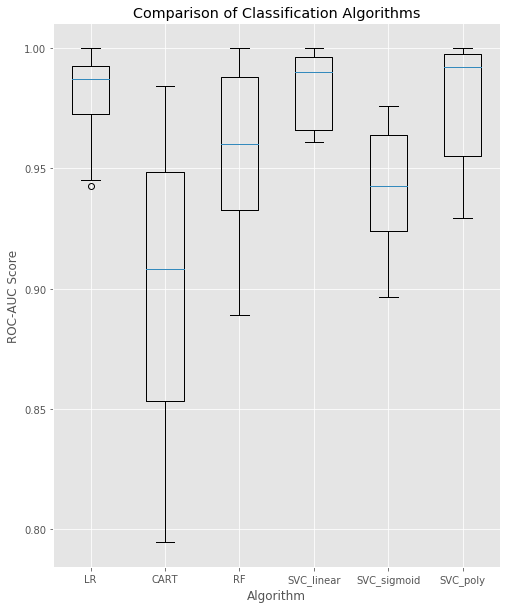

In [106]:
#Compare Algorithms

fig = plt.figure(figsize=(8,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### Gridsearch for SVM

In [107]:
# We decided to use gridsearch model selection technique after its performance was lower, compared to other algorithms

In [108]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
from sklearn.model_selection import GridSearchCV


In [110]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
parameters = [{'C': param_range, 'kernel': ['linear']},
              {'C': param_range, 'kernel': ['poly'],'degree':[2,3,4], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': param_range, 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', #Puanlamayı doğruluğa göre yap
                           cv = 10, #K fold değeri
                           n_jobs = -1) # -1 bütün çekirdekleri kullan
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [111]:
print('En iyi tahmin oranı: %',round(best_accuracy*100,2))
print('En iyi parametreler: ',best_parameters)

En iyi tahmin oranı: % 95.25
En iyi parametreler:  {'kernel': 'poly', 'C': 0.001, 'degree': 3, 'gamma': 0.7}


### Basic Hybrid ML Algorithm

In [112]:
sumpredictions

[4,
 6,
 1,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 1,
 3,
 0,
 3,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 4,
 6,
 3,
 6,
 0,
 0,
 6,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 0,
 6,
 0,
 6,
 0,
 0,
 3,
 0,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 3,
 6,
 6,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 6,
 6,
 3,
 5,
 0,
 3,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 3,
 4,
 0,
 0,
 6,
 0,
 6,
 0,
 3,
 0,
 6]

In [113]:
predictions_greater_than_2 =[int(sumprediction>=2) for sumprediction in sumpredictions]
predictions_greater_than_3 =[int(sumprediction>=3) for sumprediction in sumpredictions]

In [114]:
cnf_hibrit_2 = confusion_matrix(y_validation,predictions_greater_than_2)
cnf_hibrit_3 = confusion_matrix(y_validation,predictions_greater_than_3)

### Report For cnf_hybrid_2

In [115]:
cnf_hibrit_2

array([[64,  9],
       [ 6, 48]])

In [116]:
confusion_matrix_yuzde(cm=cnf_hibrit_2)

0.8818897637795275

In [117]:
f1_score , recall,precision= get_f1(cm=cnf_hibrit_2)

In [118]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.8951048951048951 
recall =  0.9142857142857143 
precision =  0.8767123287671232


### Report For cnf_hybrid_3

In [119]:
cnf_hibrit_3

array([[64,  9],
       [ 6, 48]])

In [120]:
confusion_matrix_yuzde(cm=cnf_hibrit_3)

0.8818897637795275

In [121]:
f1_score , recall,precision= get_f1(cm=cnf_hibrit_3)

In [122]:
print('f1_score = ' ,f1_score, '\nrecall = ',recall,'\nprecision = ',precision )

f1_score =  0.8951048951048951 
recall =  0.9142857142857143 
precision =  0.8767123287671232


In [123]:
#visualizing RF
#model1 = RandomForestClassifier(n_estimators=10)

# Train
#model1.fit(X_train, y_train)
#model_kaydet(kernel=model1,kernel_name='randomforestviz')
# Extract single tree
#estimator = model1.estimators_[5]

#from sklearn.tree import export_graphviz
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
 #               feature_names = X.columns.tolist(),
  #              class_names = ['0',' 1'],
   #             rounded = True, proportion = False, 
    #            precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

# III.IV. DEEP LEARNING

## Deep neural network - Preprocessing

In [124]:
# X = data.iloc[:, data.columns != 'Class']
# y = data.iloc[:, data.columns == 'Class']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [125]:
# X_train.shape 

In [126]:
# X_test.shape 

In [127]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test) 

# Deep Neural Network - Processing

In [128]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout 

In [129]:
# model = Sequential([
#     Dense(units=16, input_dim = 30,activation='relu'),
#     Dense(units=24,activation='relu'),
#     Dropout(0.5),
#     Dense(20,activation='relu'),
#     Dense(24,activation='relu'),
#     Dense(1,activation='sigmoid'),
# ]) 

In [130]:
# model.summary() 

In [131]:
## Training

In [132]:
# epochs_for_training = [1,5,10] 

In [133]:
# for epoch in epochs_for_training:
#     model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#     model.fit(X_train,y_train,batch_size=15,epochs=epoch)
#     score = model.evaluate(X_test, y_test)
#     print(score,' for {} epoch'.format(epoch))
#     model_kaydet(kernel=model,kernel_name='ann{}'.format(epoch))

## Undersampling

In [134]:
# fraud_indices = np.array(data[data.Class == 1].index)
# number_records_fraud = len(fraud_indices)
# print(number_records_fraud) 

In [135]:
# normal_indices = data[data.Class == 0].index 

In [136]:
# random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
# random_normal_indices = np.array(random_normal_indices)
# print(len(random_normal_indices))

In [137]:
# under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
# print(len(under_sample_indices))

In [138]:
# under_sample_data = data.iloc[under_sample_indices,:]

In [139]:
# X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
# y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [140]:
# X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [141]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [142]:
# model.summary()

In [143]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.fit(X_train,y_train,batch_size=15,epochs=5)

In [144]:
# y_pred = model.predict(X_test)
# y_expected = pd.DataFrame(y_test)
# cnf_matrix = confusion_matrix(y_expected, y_pred.round())
# plot_confusion_matrix(title_plt='Sampled NN', cm=cnf_matrix, classes=[0,1])
# plt.show()

In [145]:
# y_pred = model.predict(X)
# y_expected = pd.DataFrame(y)
# cnf_matrix = confusion_matrix(y_expected, y_pred.round())
# plot_confusion_matrix(title_plt='Whole Dataframe', cm=cnf_matrix, classes=[0,1])
# plt.show()

## SMOTE

In [146]:
# %%bash
# pip install -U imbalanced-learn

In [147]:
# from imblearn.over_sampling import SMOTE

In [148]:
# X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [149]:
# y_resample = pd.DataFrame(y_resample)
# X_resample = pd.DataFrame(X_resample)

In [150]:
# X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [151]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [152]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.fit(X_train,y_train,batch_size=15,epochs=5)

In [153]:
# y_pred = model.predict(X_test)
# y_expected = pd.DataFrame(y_test)
# cnf_matrix = confusion_matrix(y_expected, y_pred.round())
# plot_confusion_matrix(title_plt='TEST DF SMOTE ',cm=cnf_matrix, classes=[0,1])
# plt.show()

In [154]:
# y_pred = model.predict(X)
# y_expected = pd.DataFrame(y)
# cnf_matrix = confusion_matrix(y_expected, y_pred.round())
# plot_confusion_matrix(title_plt='Whole DF SMOTE',cm=cnf_matrix, classes=[0,1])
# plt.show()

### After Pickle for Deep Learning

In [155]:
ann5 = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/ann5','rb'))
ann15 = pickle.load(open('/home/cem/PycharmProjects/FraudDetection/models/ann15','rb'))

# Kaydettiklerimizi yüklüyoruz.

Using TensorFlow backend.
/home/cem/PycharmProjects/FraudDetection/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cem/PycharmProjects/FraudDetection/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cem/PycharmProjects/FraudDetection/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

### Comparison of Classiffication Algorithms Including Deep Learning

In [156]:
models = []

models.append(('LR', logistic_regression))
models.append(('decisiontree', decisiontree))
models.append(('sigmoid_svc', sigmoid_svc))
models.append(('poly_svc', sigmoid_svc))
models.append(('linear_svc', sigmoid_svc))
models.append(('random_forest', random_forest))
models.append(('ann5',ann5))
models.append(('ann15',ann15))

# Models listesi içine ilgili oop classifierları ilgili isimleri ile birlikte tuple halinde ekleniyor. 
# printte loglara ilgili classifierların isimlerini yazabilmek için. 

In [157]:
models[0]

('LR',
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False))

In [158]:
x = []
confusion_matrices = []
for name,model in models:
    predictions = model.predict(X_validation)
    cnf = confusion_matrix(y_validation,predictions.round())
    
    yuzde = confusion_matrix_yuzde(cm=cnf)
    f1_score , recall,precision= get_f1(cm=cnf)
    print(name,'->','\n',cnf,'\n\n',yuzde,'\n','f1_score : ',f1_score,'\nrecall = ',recall,'\nprecision = ',precision)
    x.append(predictions)

sumpredictions = [sum(elts) for elts in zip(*x)]

LR -> 
 [[73  0]
 [ 9 45]] 

 0.9291338582677166 
 f1_score :  0.9419354838709678 
recall =  0.8902439024390244 
precision =  1.0
decisiontree -> 
 [[66  7]
 [ 9 45]] 

 0.8740157480314961 
 f1_score :  0.8918918918918919 
recall =  0.88 
precision =  0.9041095890410958
sigmoid_svc -> 
 [[64  9]
 [19 35]] 

 0.7795275590551181 
 f1_score :  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232
poly_svc -> 
 [[64  9]
 [19 35]] 

 0.7795275590551181 
 f1_score :  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232
linear_svc -> 
 [[64  9]
 [19 35]] 

 0.7795275590551181 
 f1_score :  0.8205128205128205 
recall =  0.7710843373493976 
precision =  0.8767123287671232
random_forest -> 
 [[73  0]
 [ 9 45]] 

 0.9291338582677166 
 f1_score :  0.9419354838709678 
recall =  0.8902439024390244 
precision =  1.0
ann5 -> 
 [[73  0]
 [15 39]] 

 0.8818897637795275 
 f1_score :  0.906832298136646 
recall =  0.8295454545454546 
precision =  1.0